In [115]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import matplotlib.pyplot as plt

In [116]:
meteostat_1 = pd.read_csv('processed/442100110323_daily_meteostat.csv')
meteostat_1

,READ_DATE,KWH_EXP,tavg,tmin,tmax,wdir,wspd,pres
0,2019-01-01,1.704497,25.7,24.8,30.2,44.0,6.4,1008.9
1,2019-01-02,1.804380,26.0,24.1,29.2,21.0,5.4,1009.2
2,2019-01-03,1.606232,24.6,24.0,27.3,340.0,4.1,1010.3
3,2019-01-04,1.220510,26.2,23.0,29.8,340.0,6.9,1011.4
4,2019-01-05,0.980424,26.9,23.6,30.2,284.0,6.3,1011.7
...,...,...,...,...,...,...,...,...
1973,2024-05-27,64.703542,28.3,24.4,34.0,126.0,9.9,1009.9
1974,2024-05-28,63.751474,28.2,24.1,33.9,125.0,8.0,1009.4
1975,2024-05-29,68.610622,29.0,24.2,33.0,130.0,7.7,1009.1
1976,2024-05-30,65.846084,29.7,25.0,35.0,106.0,7.8,1009.7


In [117]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')
df_weather

,Tanggal,Tavg,RH_avg,RR,ss
0,2019-01-01,25.7,96.0,12.9,7.5
1,2019-01-02,25.9,90.0,42.7,6.7
2,2019-01-03,24.9,94.0,0.5,0.1
3,2019-01-04,25.8,88.0,34.6,0.1
4,2019-01-05,26.7,88.0,2.1,3.2
...,...,...,...,...,...
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0


In [118]:
meteostat_1['READ_DATE'] = pd.to_datetime(meteostat_1['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

meteostat_1['READ_DATE_day'] = meteostat_1['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

meteostat_1 = pd.merge(meteostat_1, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
meteostat_1.drop(columns=['Tanggal'], inplace=True)

meteostat_1.drop(columns=['READ_DATE_day'], inplace=True)

In [119]:
meteostat_1

,READ_DATE,KWH_EXP,tavg,tmin,tmax,wdir,wspd,pres,Tavg,RH_avg,RR,ss
0,2019-01-01,1.704497,25.7,24.8,30.2,44.0,6.4,1008.9,25.7,96.0,12.9,7.5
1,2019-01-02,1.804380,26.0,24.1,29.2,21.0,5.4,1009.2,25.9,90.0,42.7,6.7
2,2019-01-03,1.606232,24.6,24.0,27.3,340.0,4.1,1010.3,24.9,94.0,0.5,0.1
3,2019-01-04,1.220510,26.2,23.0,29.8,340.0,6.9,1011.4,25.8,88.0,34.6,0.1
4,2019-01-05,0.980424,26.9,23.6,30.2,284.0,6.3,1011.7,26.7,88.0,2.1,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2024-05-27,64.703542,28.3,24.4,34.0,126.0,9.9,1009.9,28.7,73.0,0.0,10.4
1974,2024-05-28,63.751474,28.2,24.1,33.9,125.0,8.0,1009.4,28.2,75.0,0.0,8.2
1975,2024-05-29,68.610622,29.0,24.2,33.0,130.0,7.7,1009.1,29.0,77.0,0.0,10.7
1976,2024-05-30,65.846084,29.7,25.0,35.0,106.0,7.8,1009.7,29.6,73.0,0.0,10.6


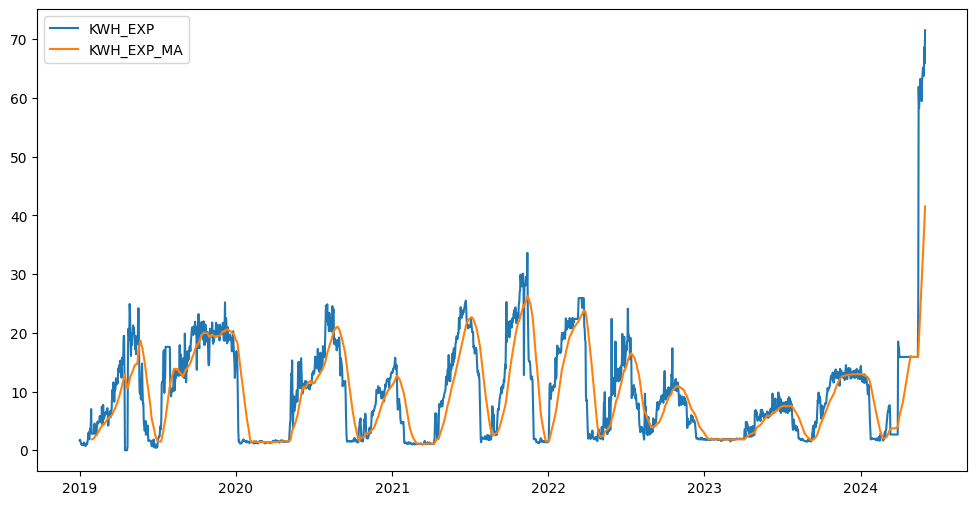

In [120]:
# smoothing data KWH_EXP dengan moving average
meteostat_1['KWH_EXP_MA'] = meteostat_1['KWH_EXP'].rolling(window=30).mean() # 30 hari


# plot perbedaan data KWH_EXP dengan KWH_EXP_MA
plt.figure(figsize=(12, 6))
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP'], label='KWH_EXP')
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP_MA'], label='KWH_EXP_MA')
plt.legend()
plt.show()


In [121]:
meteostat_1['KWH_EXP_MA'].isnull().sum()
meteostat_1['KWH_EXP_MA'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_2267/2474992271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meteostat_1['KWH_EXP_MA'].fillna(method='bfill', inplace=True)
/tmp/ipykernel_2267/2474992271.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  meteostat_1['KWH_EXP_MA'].fillna(method='bfill', inplace=True)


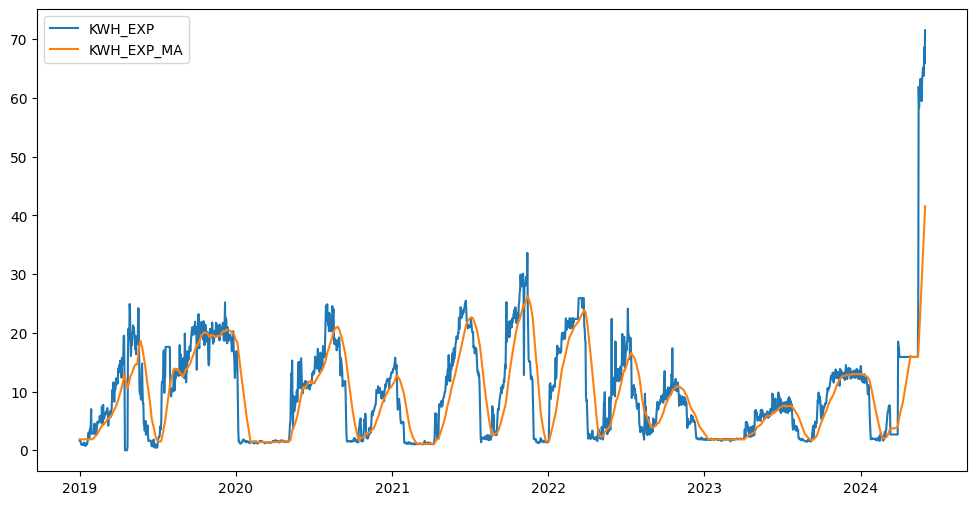

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP'], label='KWH_EXP')
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP_MA'], label='KWH_EXP_MA')
plt.legend()
plt.show()

/root/miniconda3/envs/pbl/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


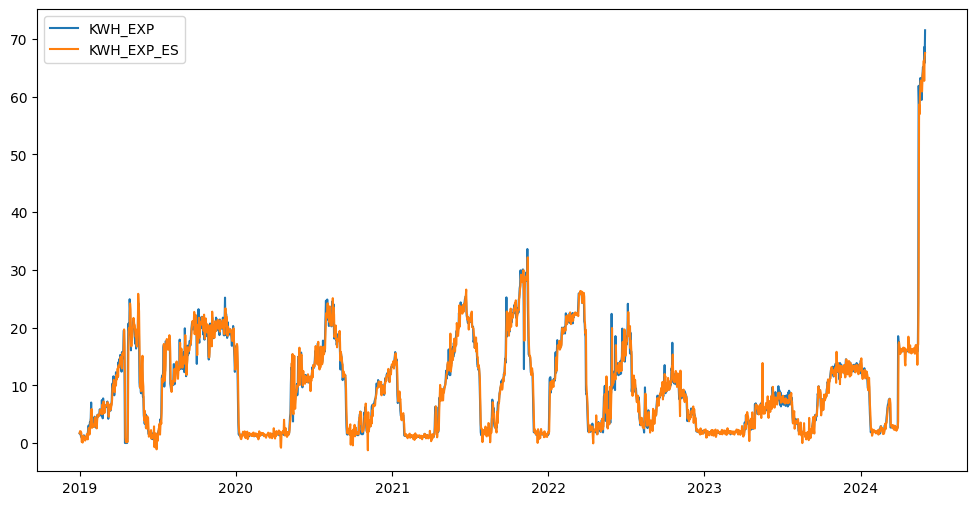

In [123]:
# smoothing data KWH_EXP dengan exponential smoothing holts winter
model = ExponentialSmoothing(meteostat_1['KWH_EXP'], trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()
meteostat_1['KWH_EXP_ES'] = model_fit.fittedvalues


plt.figure(figsize=(12, 6))
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP'], label='KWH_EXP')
plt.plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP_ES'], label='KWH_EXP_ES')
plt.legend()
plt.show()


110930628906.25


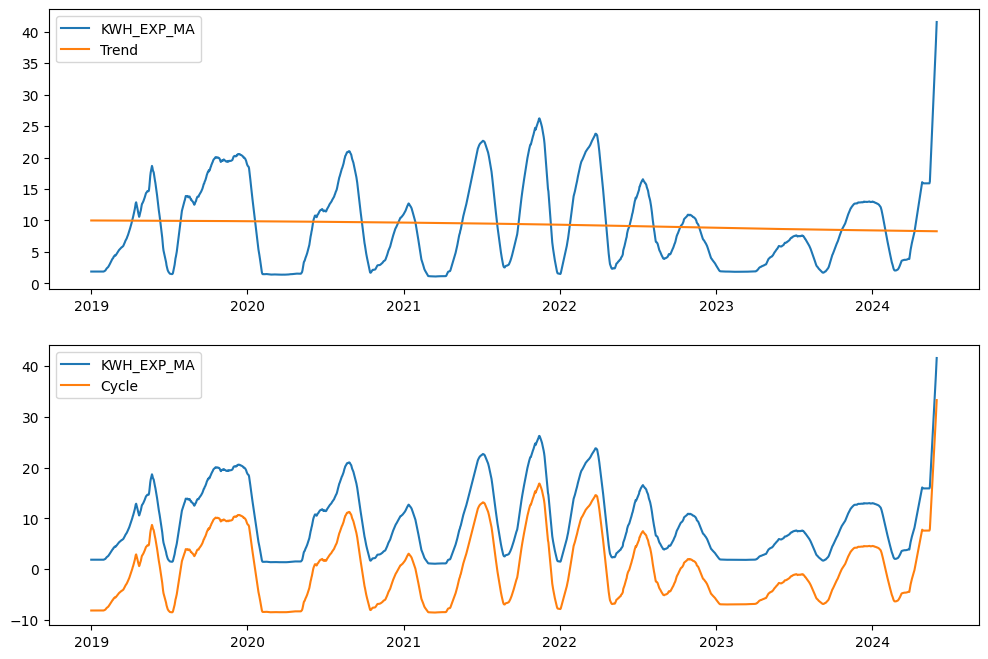

In [124]:
# Menghitung nilai lambda untuk data harian berdasarkan aturan skala dari Ravn & Uhlig (2002)
# Rumus umum:
# lambda_new = lambda_base * (f_new / f_base) ** 4
# Di mana:
# - lambda_base = 1600 (untuk data kuartalan)
# - f_base = 4 (frekuensi data kuartalan: 4 titik per tahun)
# - f_new = 252 (jika hanya hari kerja) atau 365 (jika termasuk semua hari)

# Perhitungan lambda untuk data harian (semua hari, 365 hari/tahun)
lambda_daily_365 = 1600 * (365 / 4) ** 4  # Hasil: sekitar 69.3 x 10^9
print(lambda_daily_365)
# decompose menggunakan hpfilter
cycle, trend = hpfilter(meteostat_1['KWH_EXP_MA'], lamb=lambda_daily_365)
meteostat_1['trend_ma'] = trend
meteostat_1['cycle_ma'] = cycle

# plot perbedaan data KWH_EXP dengan trend, KWH_EXP dengan cycle
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP_MA'], label='KWH_EXP_MA')
ax[0].plot(meteostat_1['READ_DATE'], meteostat_1['trend_ma'], label='Trend')
ax[0].legend()

ax[1].plot(meteostat_1['READ_DATE'], meteostat_1['KWH_EXP_MA'], label='KWH_EXP_MA')
ax[1].plot(meteostat_1['READ_DATE'], meteostat_1['cycle_ma'], label='Cycle')
ax[1].legend()

plt.show()


In [125]:
meteostat_1.isna().sum()

READ_DATE     0
KWH_EXP       0
tavg          0
tmin          0
tmax          0
wdir          0
wspd          0
pres          0
Tavg          0
RH_avg        0
RR            0
ss            0
KWH_EXP_MA    0
KWH_EXP_ES    0
trend_ma      0
cycle_ma      0
dtype: int64

In [126]:
# meteostat_1['trend'].fillna(meteostat_1['trend'].mean(), inplace=True)
# meteostat_1['residual'].fillna(meteostat_1['residual'].mean(), inplace=True)
# meteostat_1.fillna(0, inplace=True)

In [127]:
meteostat_1

,READ_DATE,KWH_EXP,tavg,tmin,tmax,wdir,wspd,pres,Tavg,RH_avg,RR,ss,KWH_EXP_MA,KWH_EXP_ES,trend_ma,cycle_ma
0,2019-01-01,1.704497,25.7,24.8,30.2,44.0,6.4,1008.9,25.7,96.0,12.9,7.5,1.870943,1.678119,9.991498,-8.120555
1,2019-01-02,1.804380,26.0,24.1,29.2,21.0,5.4,1009.2,25.9,90.0,42.7,6.7,1.870943,2.057167,9.991252,-8.120309
2,2019-01-03,1.606232,24.6,24.0,27.3,340.0,4.1,1010.3,24.9,94.0,0.5,0.1,1.870943,2.029903,9.991007,-8.120064
3,2019-01-04,1.220510,26.2,23.0,29.8,340.0,6.9,1011.4,25.8,88.0,34.6,0.1,1.870943,1.976301,9.990761,-8.119818
4,2019-01-05,0.980424,26.9,23.6,30.2,284.0,6.3,1011.7,26.7,88.0,2.1,3.2,1.870943,1.704463,9.990515,-8.119572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2024-05-27,64.703542,28.3,24.4,34.0,126.0,9.9,1009.9,28.7,73.0,0.0,10.4,34.669681,64.771224,8.280109,26.389572
1974,2024-05-28,63.751474,28.2,24.1,33.9,125.0,8.0,1009.4,28.2,75.0,0.0,8.2,36.264897,66.238063,8.279209,27.985689
1975,2024-05-29,68.610622,29.0,24.2,33.0,130.0,7.7,1009.1,29.0,77.0,0.0,10.7,38.022085,62.751439,8.278308,29.743777
1976,2024-05-30,65.846084,29.7,25.0,35.0,106.0,7.8,1009.7,29.6,73.0,0.0,10.6,39.687122,66.925352,8.277408,31.409714


In [128]:
# save to csv
meteostat_1.to_csv('processed/aa_442100110323_engineered.csv', index=False)